In [19]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import jaccard_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix

In [20]:
df = pd.read_csv('training_sample.csv')
X = df.drop('UserID',axis=1)
df.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


In [3]:
# Check if there are any missing values
df.isnull().sum() 

UserID                     0
basket_icon_click          0
basket_add_list            0
basket_add_detail          0
sort_by                    0
image_picker               0
account_page_click         0
promo_banner_click         0
detail_wishlist_add        0
list_size_dropdown         0
closed_minibasket_click    0
checked_delivery_detail    0
checked_returns_detail     0
sign_in                    0
saw_checkout               0
saw_sizecharts             0
saw_delivery               0
saw_account_upgrade        0
saw_homepage               0
device_mobile              0
device_computer            0
device_tablet              0
returning_user             0
loc_uk                     0
ordered                    0
dtype: int64

In [17]:
sum(df.ordered==0)

436308

array([[<AxesSubplot:title={'center':'basket_icon_click'}>,
        <AxesSubplot:title={'center':'basket_add_list'}>,
        <AxesSubplot:title={'center':'basket_add_detail'}>,
        <AxesSubplot:title={'center':'sort_by'}>,
        <AxesSubplot:title={'center':'image_picker'}>],
       [<AxesSubplot:title={'center':'account_page_click'}>,
        <AxesSubplot:title={'center':'promo_banner_click'}>,
        <AxesSubplot:title={'center':'detail_wishlist_add'}>,
        <AxesSubplot:title={'center':'list_size_dropdown'}>,
        <AxesSubplot:title={'center':'closed_minibasket_click'}>],
       [<AxesSubplot:title={'center':'checked_delivery_detail'}>,
        <AxesSubplot:title={'center':'checked_returns_detail'}>,
        <AxesSubplot:title={'center':'sign_in'}>,
        <AxesSubplot:title={'center':'saw_checkout'}>,
        <AxesSubplot:title={'center':'saw_sizecharts'}>],
       [<AxesSubplot:title={'center':'saw_delivery'}>,
        <AxesSubplot:title={'center':'saw_account_upgra

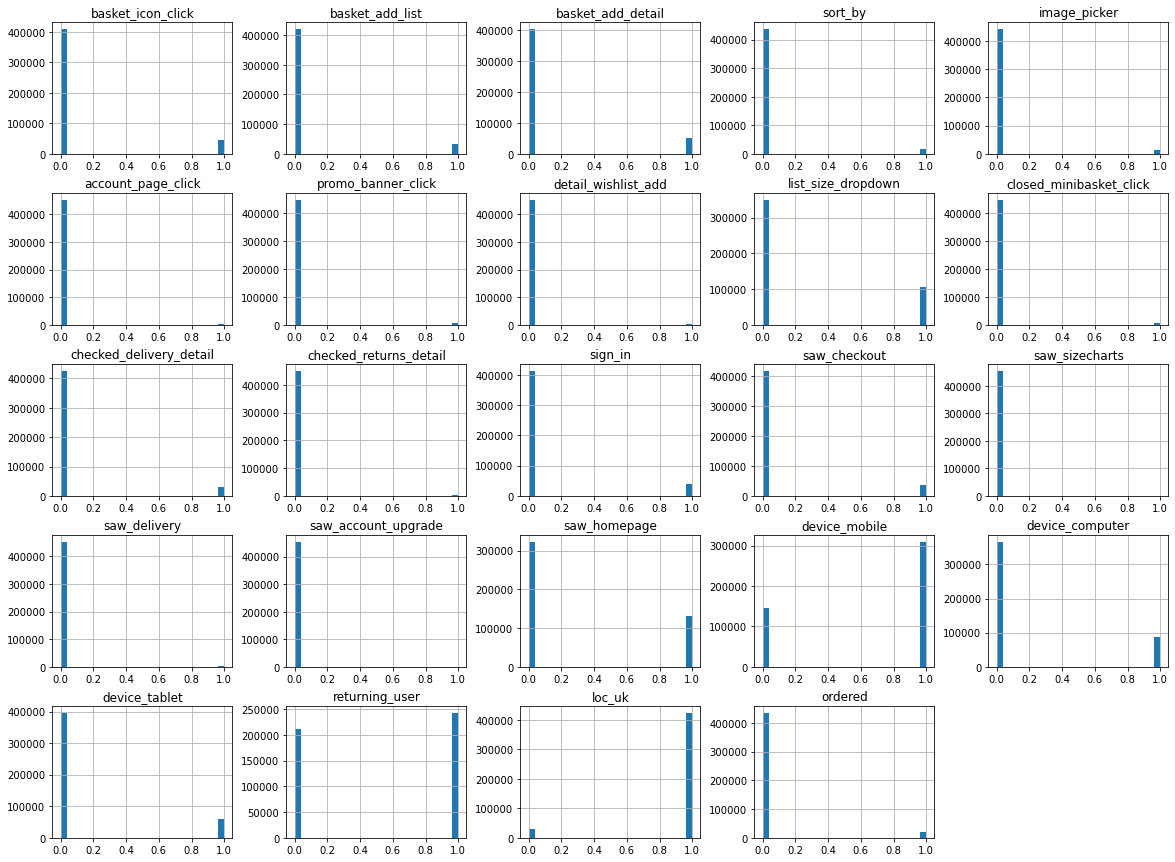

In [8]:
df.hist(bins=25, figsize=(20, 15))


<AxesSubplot:>

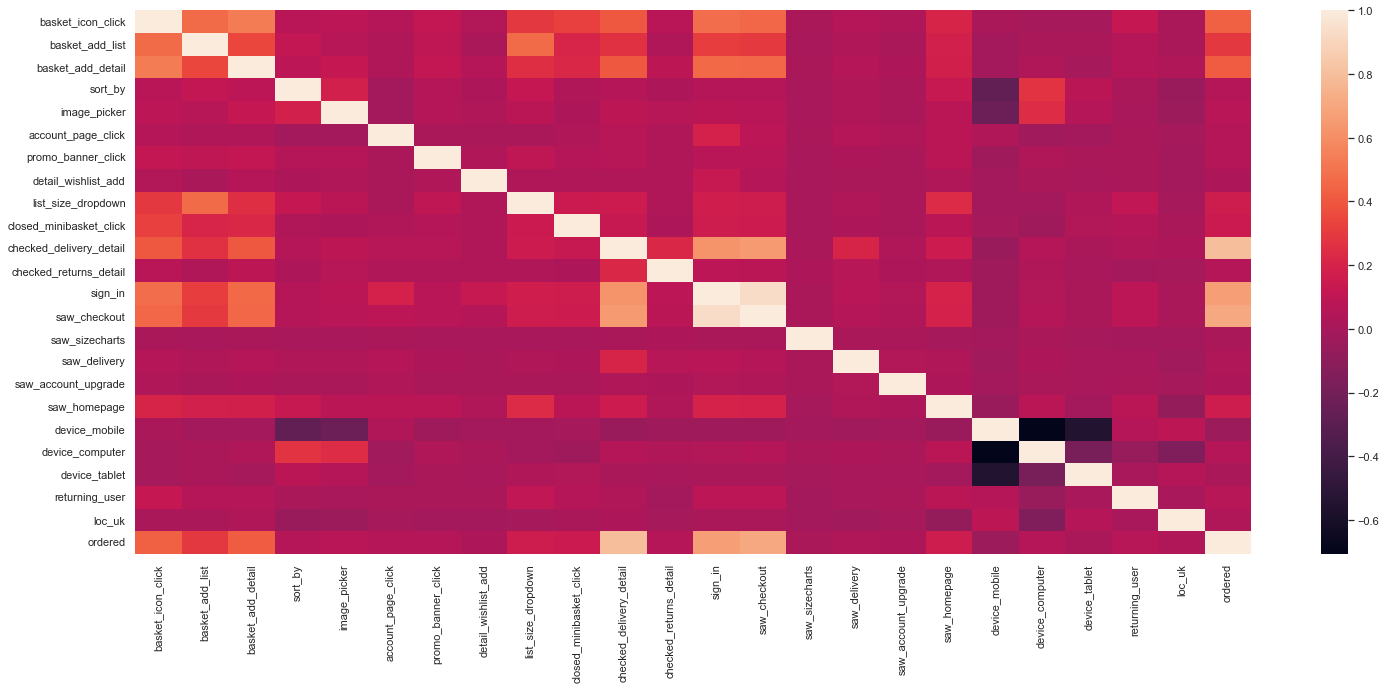

In [28]:
sns.set(rc = {'figure.figsize':(25,10)})
sns.heatmap(df.corr())

In [14]:
df.isna().sum()

UserID                     0
basket_icon_click          0
basket_add_list            0
basket_add_detail          0
sort_by                    0
image_picker               0
account_page_click         0
promo_banner_click         0
detail_wishlist_add        0
list_size_dropdown         0
closed_minibasket_click    0
checked_delivery_detail    0
checked_returns_detail     0
sign_in                    0
saw_checkout               0
saw_sizecharts             0
saw_delivery               0
saw_account_upgrade        0
saw_homepage               0
device_mobile              0
device_computer            0
device_tablet              0
returning_user             0
loc_uk                     0
ordered                    0
dtype: int64

In [4]:
# Find max correlation possible
def max_correl_possible(col1 , col2 , df):
    a = len(df[(df[col1] == 1) & (df[col2] == 0)])
    
    b = len(df[(df[col1] == 1) & (df[col2] == 1)])
  
    c = len(df[(df[col1] == 0) & (df[col2] == 0)])
    
    d = len(df[(df[col1] == 0) & (df[col2] == 1)])
    
    n = len(df)
    p1 = (a+b)/n
    p2 = (b+d)/n
    if(p1 > p2):
        pj = p1
        pi = p2
    else:
        pj = p2
        pi = p1
    if(pi == p1):
        qi = (c+d)/n
        qj = (a+c)/n
    else:
        qj = (c+d)/n
        qi = (a+c)/n
    if(qi == 0 or pj == 0):
        return 1
    q_max = math.sqrt((pi*qj)/(qi*pj))

    return q_max

In [5]:
def find_correl(col1 , col2 , df):
    a = len(df[(df[col1] == 1) & (df[col2] == 0)])
    c = len(df[(df[col1] == 1) & (df[col2] == 1)])
    b = len(df[(df[col1] == 0) & (df[col2] == 0)])
    d = len(df[(df[col1] == 0) & (df[col2] == 1)])
    n = len(df)
    return (b*c - a*d)/math.sqrt((a+b)*(a+c)*(b+d)*(c+d))

In [6]:
def create_correl_df_with_response(df):
    max_correl_list = []
    correl_list = []
    col_list = []
    for col in df.columns:
        if(col == 'ordered' or col == 'UserID'):
            continue
        col_list.append(col)
        max_correl_list.append(max_correl_possible(col,'ordered',df))
        correl_list.append(find_correl(col,'ordered',df))
    return_df = pd.DataFrame({'column':col_list,
                  'correl':correl_list,
                 'max_correl':max_correl_list
                 })
    return_df['ratio'] = round(return_df['correl']/return_df['max_correl'] , 2)
    return return_df

In [7]:
create_correl_df_with_response(df)

,column,correl,max_correl,ratio
0,basket_icon_click,0.428334,0.630551,0.68
1,basket_add_list,0.287666,0.737198,0.39
2,basket_add_detail,0.414420,0.586334,0.71
3,sort_by,0.054636,0.935027,0.06
4,image_picker,0.071492,0.792285,0.09
5,account_page_click,0.057279,0.286154,0.20
6,promo_banner_click,0.056533,0.613576,0.09
7,detail_wishlist_add,0.023516,0.283760,0.08
8,list_size_dropdown,0.154867,0.382365,0.41
9,closed_minibasket_click,0.140011,0.633839,0.22


In [21]:
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [23]:
vif

,feature,VIF
0,basket_icon_click,2.053465
1,basket_add_list,1.676683
2,basket_add_detail,1.782741
3,sort_by,1.185455
4,image_picker,1.138845
5,account_page_click,1.130253
6,promo_banner_click,1.042686
7,detail_wishlist_add,1.067372
8,list_size_dropdown,1.765511
9,closed_minibasket_click,1.151323


In [34]:
confusion_matrix(df['saw_checkout'],df['ordered'])

array([[418930,      0],
       [ 17378,  19093]], dtype=int64)